# K-means clustering
 
  The k-means algorithm (k-means clustering algorithm) is a basic algorithm for dividing the number of known clustering categories. It is very typical of distance-based clustering algorithms that use distance as an evaluation index of similarity, i.e., it is considered that the closer two objects are to each other, the greater their similarity. The algorithm considers that clusters are composed of objects that are close to each other, so it takes getting compact and independent clusters as the final goal. It uses the Euclidean distance metric (simply understood as the distance between two points in a straight line, the Euclidean distance is just a more normalized definition of this distance, extended to N dimensions). It can handle large datasets and is efficient. Its input is naturally the dataset and the number of classes. The clustering results are k datasets divided into k classes. 
  
  The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
                             

$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
-------


In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import mode

In [46]:
df = pd.read_csv('train-set.csv', header = 0)
df.head(5) # look for first 5 rows

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


In [47]:
is_NaN = df.isnull()#Look for NaN
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A
12,461230,Female,No,19,No,Executive,0.0,Low,NaN,Category 3,D
13,459573,Male,Yes,70,No,Lawyer,NaN,Low,1.0,Category 6,A
24,461021,Female,NaN,58,No,Executive,1.0,Average,3.0,Category 3,B
...,...,...,...,...,...,...,...,...,...,...,...
8040,467165,Female,No,25,No,Homemaker,NaN,Low,1.0,Category 6,D
8044,466997,Female,NaN,50,No,Engineer,1.0,Low,2.0,Category 6,D
8047,462396,Male,Yes,50,Yes,Doctor,NaN,Average,2.0,Category 6,C
8049,461292,Female,Yes,81,No,Lawyer,NaN,High,2.0,Category 3,D


In [48]:
df = df.fillna("Unknown") # fill NaNs with "Unknown"

In [49]:
#For clustering task, we need to have numeric data (e.g. interger and/or float data). 
#In this case, we need to convert text data (e.g. "Male"/"Female") to numeric data (e.g. 0/1).
df["Gender"] = pd.factorize(df["Gender"])[0]
df["Married"] = pd.factorize(df["Married"])[0]
df["Graduated"] = pd.factorize(df["Graduated"])[0]
df["Profession"] = pd.factorize(df["Profession"])[0]
df["SpendingScore"] = pd.factorize(df["SpendingScore"])[0]
df["Category"] = pd.factorize(df["Category"])[0]

In [50]:
#Also, we will replace "Unknown" values in some numerical columns with mode.
df["WorkExperience"] = df["WorkExperience"].replace("Unknown",df["WorkExperience"].mode()[0])
df["FamilySize"] = df["FamilySize"].replace("Unknown",df["FamilySize"].mode()[0])

In [51]:
df.head(5) #look the result of numerice convert

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,0,0,22,0,0,1.0,0,4.0,0,D
1,462643,1,1,38,1,1,1.0,1,3.0,0,A
2,466315,1,1,67,1,1,1.0,0,1.0,1,B
3,461735,0,1,67,1,2,0.0,2,2.0,1,B
4,462669,1,1,40,1,3,1.0,2,6.0,1,A


In [54]:

scaler = MinMaxScaler(feature_range=(0, 1)) # range is [0, 1]
normed = scaler.fit_transform(df.copy().drop(columns=["CustomerID","Segmentation"]))
df_normed = pd.DataFrame(data=normed, columns=df.columns[1:-1])
df_normed.head() # check the result

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,0.0,0.0,0.056338,0.0,0.000000,0.071429,0.0,0.375,0.000000
1,1.0,0.5,0.281690,0.5,0.111111,0.071429,0.5,0.250,0.000000
2,1.0,0.5,0.690141,0.5,0.111111,0.071429,0.0,0.000,0.142857
3,0.0,0.5,0.690141,0.5,0.222222,0.000000,1.0,0.125,0.142857
4,1.0,0.5,0.309859,0.5,0.333333,0.071429,1.0,0.625,0.142857


In [56]:
# take x-values from df
x_columns = df_normed.columns
# create 'x' data for train
X_train = df_normed[x_columns]
# convert to numpy
X_train = X_train.to_numpy()

In [57]:
K = len(df['Segmentation'].unique()) # number of clusters
ITERS = 1000 # maximum iterations
RUNS = 10 # total runs

In [58]:
# init k-means method
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=ITERS, n_init=RUNS, verbose=False)

# fit and predict labels
X_train1 = X_train.copy()
labels = kmeans.fit_predict(X_train1)
print("- labels = ", labels)

# count labels
count_labels = np.bincount(labels)
print("- count_labels = ", count_labels)

# find centroids
centroids = kmeans.cluster_centers_
print("- centroids.shape = ", centroids.shape)

- labels =  [0 2 1 ... 1 1 3]
- count_labels =  [2545 2311 1340 1872]
- centroids.shape =  (4, 9)


In [59]:
# name cols as in initial dataset (without last "Segmentation")
cols = df_normed.columns[:-1]
df_res = df_normed[cols]
# add result labels
df_res["Cluster"] = labels
# insert "CustomerID" for easier understanding
df_res.insert(0, "CustomerID", df["CustomerID"])
# check the results
df_res.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Cluster
0,462809,0.0,0.0,0.056338,0.0,0.000000,0.071429,0.0,0.375,0
1,462643,1.0,0.5,0.281690,0.5,0.111111,0.071429,0.5,0.250,2
2,466315,1.0,0.5,0.690141,0.5,0.111111,0.071429,0.0,0.000,1
3,461735,0.0,0.5,0.690141,0.5,0.222222,0.000000,1.0,0.125,3
4,462669,1.0,0.5,0.309859,0.5,0.333333,0.071429,1.0,0.625,2


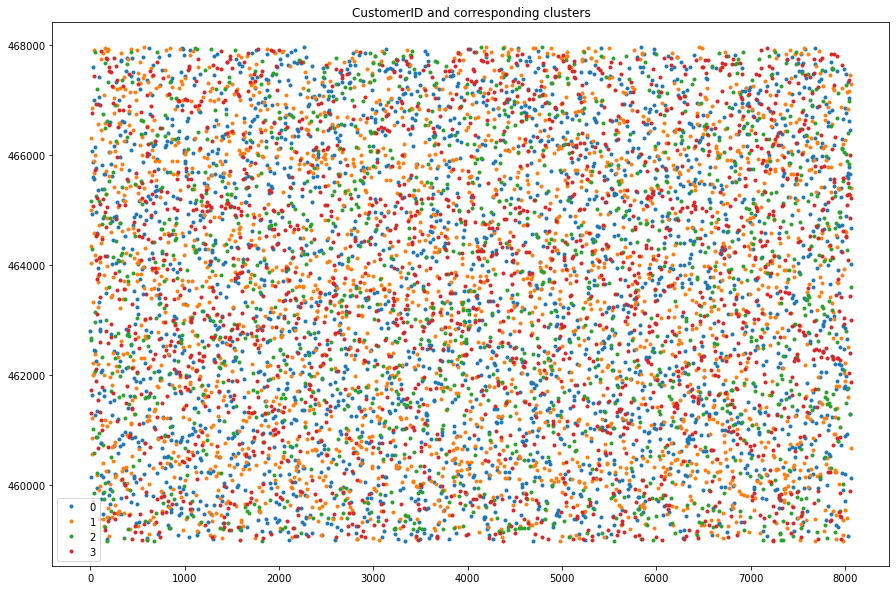

In [60]:
# get unique labels (found clusters id's)
u_labels = np.unique(labels)
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (df_res["Cluster"] == i)
    plt.plot(df_res[mask]["CustomerID"], ".", label = i)
plt.title('CustomerID and corresponding clusters')
plt.legend()
plt.show()

# Using PCA to reduce data dimension
There are 9 features in our dataset. It is difficult both to solve the clustering problem and to visualize the data with a lot of features in it clearly. So we need to reduce data dimension by using PCA method.

In [62]:
# reduce data only to 2 features
pca = PCA(n_components=2).fit_transform(X_train.copy())
# chech result shape
pca.shape

(8068, 2)

In [63]:
# initialize k-means
kmeans = KMeans(n_clusters=K, random_state=0, max_iter=ITERS, n_init=RUNS, verbose=False)
# predict the labels of clusters
labels = kmeans.fit_predict(pca)
print("- labels = ", labels)

- labels =  [1 0 2 ... 2 2 3]


In [64]:
pca_res = pd.DataFrame(pca.copy())
pca_res["Cluster"] = labels
pca_res.insert(0, "CustomerID", df["CustomerID"])
pca_res.head()

,CustomerID,0,1,Cluster
0,462809,0.307553,-0.653305,1
1,462643,-0.458270,0.381416,0
2,466315,-0.535177,0.143364,2
3,461735,0.639494,0.649138,3
4,462669,-0.340849,0.784494,0


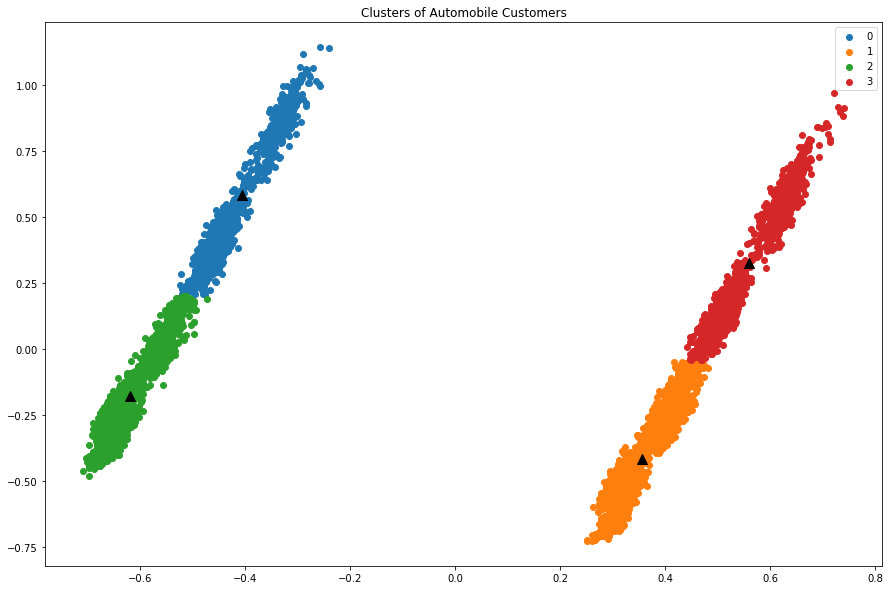

In [65]:
# get the centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(labels)

# plot the results:
plt.figure(figsize=(15,10))
for i in u_labels:
    mask = (pca_res["Cluster"] == i)
    plt.scatter(pca_res.loc[mask][0], pca_res.loc[mask][1], label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k', marker="^")
plt.title('Clusters of Automobile Customers')
plt.legend()
plt.show()